# Spin-1/2 Particles and the Stern-Gerlach Experiment

## Introduction

The Stern-Gerlach experiment, performed by Otto Stern and Walther Gerlach in 1922, provided crucial evidence for the quantization of angular momentum and the existence of electron spin. This notebook explores the quantum mechanics of spin-1/2 particles and simulates their behavior in a Stern-Gerlach apparatus.

## Theoretical Background

### Spin Angular Momentum

For a spin-1/2 particle, the spin quantum number is $s = \frac{1}{2}$. The spin angular momentum operators satisfy the commutation relations:

$$[\hat{S}_i, \hat{S}_j] = i\hbar \epsilon_{ijk} \hat{S}_k$$

The magnitude of the spin angular momentum is:

$$|\mathbf{S}| = \hbar\sqrt{s(s+1)} = \hbar\sqrt{\frac{3}{4}} = \frac{\sqrt{3}}{2}\hbar$$

### Pauli Spin Matrices

The spin operators can be expressed in terms of the Pauli matrices:

$$\hat{S}_i = \frac{\hbar}{2}\sigma_i$$

where the Pauli matrices are:

$$\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
\sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

### Spin States

The eigenstates of $\hat{S}_z$ are the spin-up and spin-down states:

$$|\uparrow\rangle = |+\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad
|\downarrow\rangle = |-\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

with eigenvalues $m_s = +\frac{1}{2}$ and $m_s = -\frac{1}{2}$ respectively:

$$\hat{S}_z|\pm\rangle = \pm\frac{\hbar}{2}|\pm\rangle$$

### Stern-Gerlach Apparatus

In the Stern-Gerlach experiment, a beam of particles passes through an inhomogeneous magnetic field. The interaction energy is:

$$\hat{H} = -\boldsymbol{\mu} \cdot \mathbf{B} = -\gamma \hat{\mathbf{S}} \cdot \mathbf{B}$$

where $\gamma = -\frac{e}{m_e}$ is the gyromagnetic ratio for an electron, and $\boldsymbol{\mu} = \gamma \hat{\mathbf{S}}$ is the magnetic moment.

The force on the particle is:

$$\mathbf{F} = \nabla(\boldsymbol{\mu} \cdot \mathbf{B}) \approx \mu_z \frac{\partial B_z}{\partial z}\hat{\mathbf{z}}$$

For a spin-1/2 particle, this results in two discrete deflection angles corresponding to $m_s = \pm\frac{1}{2}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Identity matrix
I = np.eye(2, dtype=complex)

# Spin operators (in units of hbar/2)
S_x = sigma_x / 2
S_y = sigma_y / 2
S_z = sigma_z / 2

print("Pauli Matrices:")
print(f"σ_x = \n{sigma_x}\n")
print(f"σ_y = \n{sigma_y}\n")
print(f"σ_z = \n{sigma_z}")

Pauli Matrices:
σ_x = 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

σ_y = 
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

σ_z = 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


## Spin State Representation

A general spin-1/2 state can be written as a superposition:

$$|\psi\rangle = \alpha|+\rangle + \beta|-\rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$$

where $|\alpha|^2 + |\beta|^2 = 1$ (normalization condition).

This can also be parameterized using the Bloch sphere representation:

$$|\psi\rangle = \cos\frac{\theta}{2}|+\rangle + e^{i\phi}\sin\frac{\theta}{2}|-\rangle$$

where $\theta \in [0, \pi]$ and $\phi \in [0, 2\pi)$ are spherical coordinates on the Bloch sphere.

In [2]:
def create_spin_state(theta, phi):
    """
    Create a spin state using Bloch sphere parameterization.
    
    Parameters:
    -----------
    theta : float
        Polar angle (0 to pi)
    phi : float
        Azimuthal angle (0 to 2*pi)
    
    Returns:
    --------
    numpy.ndarray
        Normalized spin state vector
    """
    alpha = np.cos(theta / 2)
    beta = np.exp(1j * phi) * np.sin(theta / 2)
    return np.array([alpha, beta], dtype=complex)

def expectation_value(state, operator):
    """
    Calculate expectation value of an operator in a given state.
    
    Parameters:
    -----------
    state : numpy.ndarray
        State vector
    operator : numpy.ndarray
        Operator matrix
    
    Returns:
    --------
    float
        Expectation value
    """
    return np.real(np.conj(state) @ operator @ state)

def measurement_probabilities(state, operator):
    """
    Calculate probabilities for measurement outcomes.
    
    Parameters:
    -----------
    state : numpy.ndarray
        State vector
    operator : numpy.ndarray
        Observable operator matrix
    
    Returns:
    --------
    tuple
        (eigenvalues, probabilities, eigenvectors)
    """
    eigenvalues, eigenvectors = np.linalg.eigh(operator)
    probabilities = []
    for i in range(len(eigenvalues)):
        eigenvec = eigenvectors[:, i]
        prob = np.abs(np.conj(eigenvec) @ state)**2
        probabilities.append(prob)
    return eigenvalues, np.array(probabilities), eigenvectors

# Example: Create spin state pointing in +x direction
# (theta=pi/2, phi=0 corresponds to |+x> = (|+> + |->)/sqrt(2))
state_plus_x = create_spin_state(np.pi/2, 0)
print(f"State |+x⟩ = {state_plus_x}")
print(f"Normalization check: |α|² + |β|² = {np.abs(state_plus_x[0])**2 + np.abs(state_plus_x[1])**2:.6f}")

State |+x⟩ = [0.70710678+0.j 0.70710678+0.j]
Normalization check: |α|² + |β|² = 1.000000


## Stern-Gerlach Measurement Simulation

When a spin-1/2 particle passes through a Stern-Gerlach apparatus oriented along direction $\hat{n}$, the particle is measured in the basis of eigenstates of $\hat{S}_n = \hat{\mathbf{S}} \cdot \hat{n}$.

For a measurement along an arbitrary direction characterized by angles $(\theta, \phi)$:

$$\hat{S}_n = \sin\theta\cos\phi\, \hat{S}_x + \sin\theta\sin\phi\, \hat{S}_y + \cos\theta\, \hat{S}_z$$

The probability of measuring spin-up along $\hat{n}$ for an initial state $|\psi\rangle$ prepared along direction $(\theta_0, \phi_0)$ is:

$$P(+|\hat{n}) = \cos^2\left(\frac{\Theta}{2}\right)$$

where $\Theta$ is the angle between the initial spin direction and $\hat{n}$.

In [3]:
def spin_operator_direction(theta, phi):
    """
    Create spin operator for measurement along direction (theta, phi).
    
    Parameters:
    -----------
    theta : float
        Polar angle of measurement direction
    phi : float
        Azimuthal angle of measurement direction
    
    Returns:
    --------
    numpy.ndarray
        Spin operator S_n
    """
    return (np.sin(theta) * np.cos(phi) * S_x + 
            np.sin(theta) * np.sin(phi) * S_y + 
            np.cos(theta) * S_z)

def stern_gerlach_simulation(initial_state, measurement_direction, n_particles=10000):
    """
    Simulate Stern-Gerlach experiment.
    
    Parameters:
    -----------
    initial_state : numpy.ndarray
        Initial spin state
    measurement_direction : tuple
        (theta, phi) of measurement axis
    n_particles : int
        Number of particles to simulate
    
    Returns:
    --------
    tuple
        (spin_up_count, spin_down_count, theoretical_prob_up)
    """
    theta, phi = measurement_direction
    S_n = spin_operator_direction(theta, phi)
    
    eigenvalues, probs, eigenvecs = measurement_probabilities(initial_state, S_n)
    
    # Simulate measurements
    measurements = np.random.choice([0, 1], size=n_particles, p=probs)
    spin_up_count = np.sum(measurements == 1)
    spin_down_count = n_particles - spin_up_count
    
    return spin_up_count, spin_down_count, probs[1]

# Prepare state in +z direction
state_z_up = create_spin_state(0, 0)
print("Initial state: |+z⟩ (spin-up along z-axis)")
print(f"State vector: {state_z_up}\n")

# Measure along different directions
directions = [
    (0, 0, "z-axis"),
    (np.pi/2, 0, "x-axis"),
    (np.pi/2, np.pi/2, "y-axis"),
    (np.pi/4, 0, "45° from z in xz-plane")
]

print("Stern-Gerlach measurements on |+z⟩ state:")
print("=" * 60)
for theta, phi, name in directions:
    up, down, prob_up = stern_gerlach_simulation(state_z_up, (theta, phi))
    print(f"\nMeasurement along {name}:")
    print(f"  Theoretical P(↑) = {prob_up:.4f}")
    print(f"  Simulated: {up} spin-up, {down} spin-down")
    print(f"  Simulated P(↑) = {up/10000:.4f}")

Initial state: |+z⟩ (spin-up along z-axis)
State vector: [1.+0.j 0.+0.j]

Stern-Gerlach measurements on |+z⟩ state:

Measurement along z-axis:
  Theoretical P(↑) = 1.0000
  Simulated: 10000 spin-up, 0 spin-down
  Simulated P(↑) = 1.0000

Measurement along x-axis:
  Theoretical P(↑) = 0.5000
  Simulated: 5006 spin-up, 4994 spin-down
  Simulated P(↑) = 0.5006

Measurement along y-axis:
  Theoretical P(↑) = 0.5000
  Simulated: 4937 spin-up, 5063 spin-down
  Simulated P(↑) = 0.4937

Measurement along 45° from z in xz-plane:
  Theoretical P(↑) = 0.8536
  Simulated: 8554 spin-up, 1446 spin-down
  Simulated P(↑) = 0.8554


## Sequential Stern-Gerlach Experiments

A fascinating aspect of quantum mechanics is revealed through sequential Stern-Gerlach experiments. Consider:

1. First apparatus (SGz): Measures along z-axis, selects spin-up
2. Second apparatus (SGx): Measures along x-axis
3. Third apparatus (SGz): Measures along z-axis again

Classically, we would expect all particles to emerge spin-up from the third apparatus. However, quantum mechanics predicts otherwise due to the non-commutativity of spin operators:

$$[\hat{S}_z, \hat{S}_x] = i\hbar \hat{S}_y \neq 0$$

In [4]:
def sequential_sg_experiment(n_particles=10000):
    """
    Simulate sequential Stern-Gerlach experiment: SGz -> SGx -> SGz
    
    Parameters:
    -----------
    n_particles : int
        Number of particles in initial beam
    
    Returns:
    --------
    dict
        Results at each stage
    """
    results = {'stages': [], 'counts': []}
    
    # Stage 1: Unpolarized beam through SGz
    # Half go up, half go down (we select spin-up)
    n_after_sg1 = n_particles // 2
    state_after_sg1 = create_spin_state(0, 0)  # |+z⟩
    results['stages'].append('After SGz (select ↑)')
    results['counts'].append(n_after_sg1)
    
    # Stage 2: Through SGx
    # |+z⟩ has 50% probability each for |+x⟩ and |-x⟩
    up_x, down_x, prob_up_x = stern_gerlach_simulation(
        state_after_sg1, (np.pi/2, 0), n_after_sg1
    )
    # Select spin-up along x
    n_after_sg2 = up_x
    state_after_sg2 = create_spin_state(np.pi/2, 0)  # |+x⟩
    results['stages'].append('After SGx (select ↑)')
    results['counts'].append(n_after_sg2)
    
    # Stage 3: Through SGz again
    # |+x⟩ has 50% probability each for |+z⟩ and |-z⟩
    up_z, down_z, prob_up_z = stern_gerlach_simulation(
        state_after_sg2, (0, 0), n_after_sg2
    )
    results['stages'].append('After final SGz: spin-up')
    results['counts'].append(up_z)
    results['stages'].append('After final SGz: spin-down')
    results['counts'].append(down_z)
    
    return results

# Run sequential experiment
seq_results = sequential_sg_experiment(10000)

print("Sequential Stern-Gerlach Experiment: SGz → SGx → SGz")
print("=" * 55)
print(f"Initial unpolarized beam: 10000 particles")
for stage, count in zip(seq_results['stages'], seq_results['counts']):
    print(f"{stage}: {count} particles")

print("\n" + "=" * 55)
print("Key insight: The intermediate x-measurement 'erases' the")
print("z-component information, allowing spin-down outcomes!")

Sequential Stern-Gerlach Experiment: SGz → SGx → SGz
Initial unpolarized beam: 10000 particles
After SGz (select ↑): 5000 particles
After SGx (select ↑): 2544 particles
After final SGz: spin-up: 1269 particles
After final SGz: spin-down: 1275 particles

Key insight: The intermediate x-measurement 'erases' the
z-component information, allowing spin-down outcomes!


## Visualization: Stern-Gerlach Deflection Pattern

We now visualize how particles are deflected in a Stern-Gerlach apparatus. The deflection depends on the spin component along the magnetic field gradient direction.

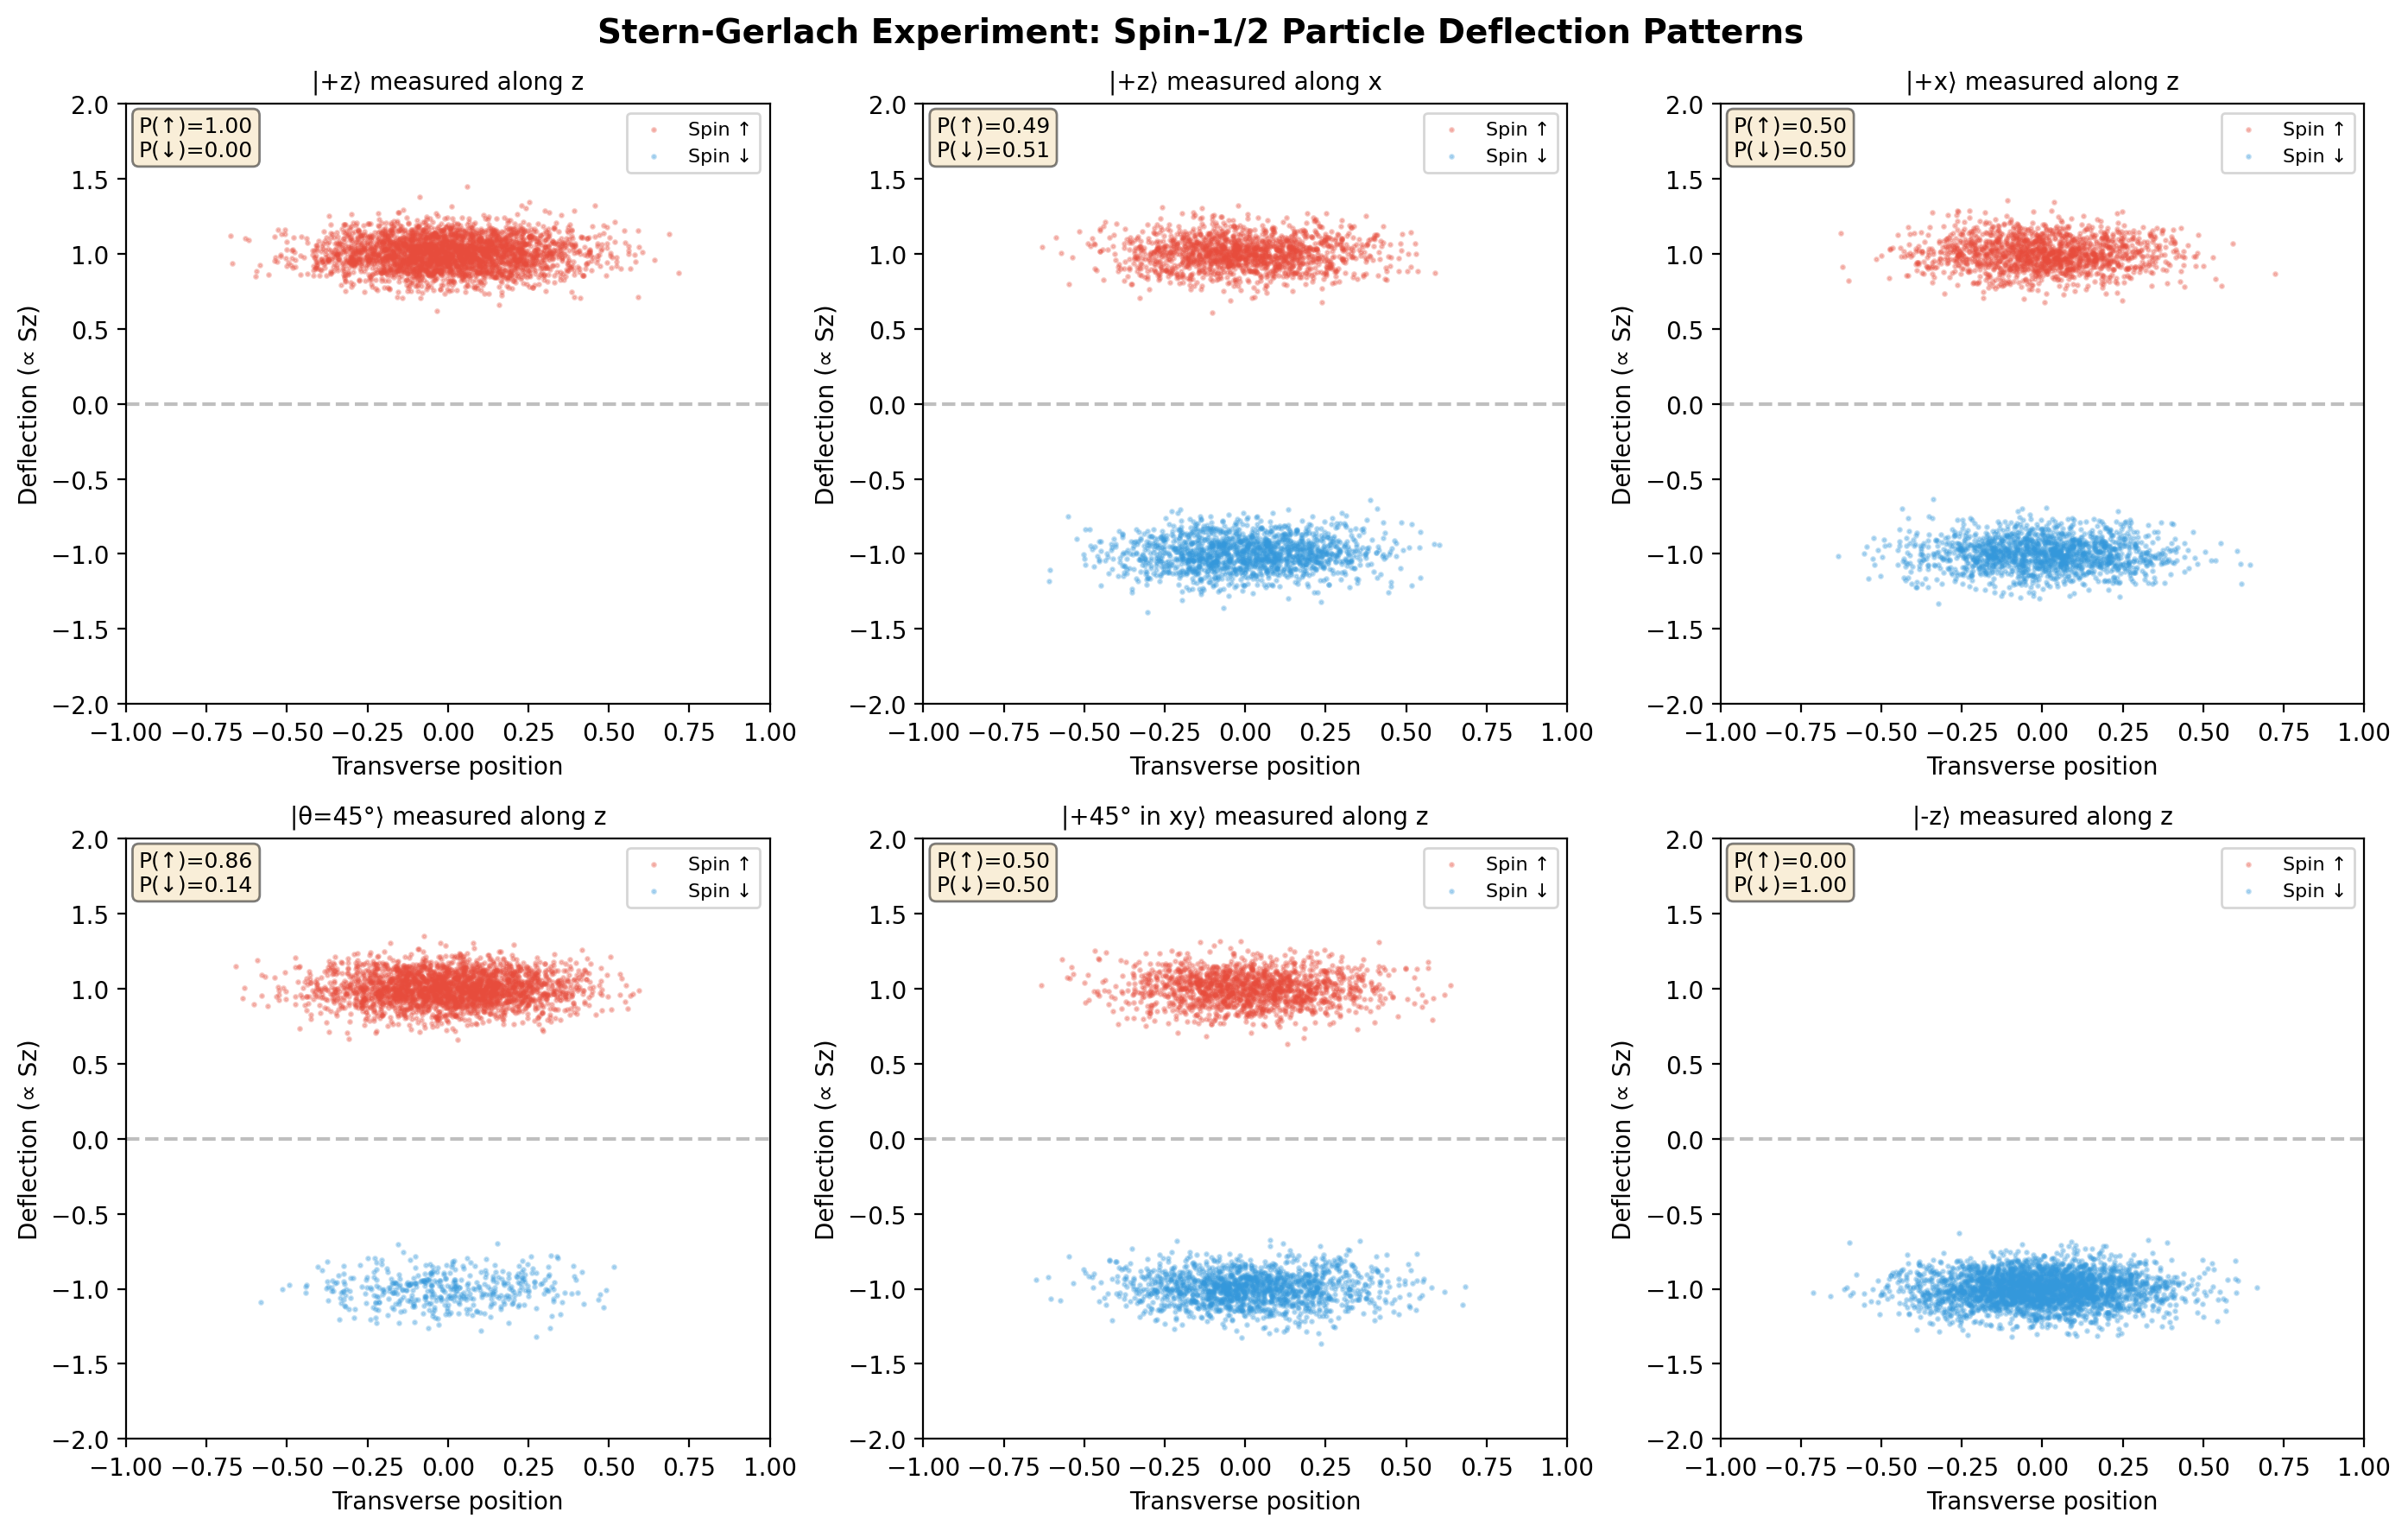


Plot saved to 'plot.png'


In [5]:
def simulate_sg_deflection(initial_theta, initial_phi, sg_theta, sg_phi, 
                           n_particles=5000, deflection_scale=1.0):
    """
    Simulate particle deflections in Stern-Gerlach apparatus.
    
    Parameters:
    -----------
    initial_theta, initial_phi : float
        Initial spin state direction
    sg_theta, sg_phi : float
        Stern-Gerlach measurement direction
    n_particles : int
        Number of particles
    deflection_scale : float
        Scale factor for deflection visualization
    
    Returns:
    --------
    tuple
        (x_positions, y_deflections, spin_results)
    """
    initial_state = create_spin_state(initial_theta, initial_phi)
    S_n = spin_operator_direction(sg_theta, sg_phi)
    eigenvalues, probs, eigenvecs = measurement_probabilities(initial_state, S_n)
    
    # Simulate measurements
    spin_results = np.random.choice([-1, 1], size=n_particles, p=[probs[0], probs[1]])
    
    # Random x-positions (transverse spread of beam)
    x_positions = np.random.normal(0, 0.2, n_particles)
    
    # Y-deflection based on spin with some spread
    y_deflections = spin_results * deflection_scale + np.random.normal(0, 0.1, n_particles)
    
    return x_positions, y_deflections, spin_results

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(14, 9))
fig.suptitle('Stern-Gerlach Experiment: Spin-1/2 Particle Deflection Patterns', 
             fontsize=14, fontweight='bold')

# Experiment configurations
experiments = [
    # (initial_theta, initial_phi, sg_theta, sg_phi, title)
    (0, 0, 0, 0, "|+z⟩ measured along z"),
    (0, 0, np.pi/2, 0, "|+z⟩ measured along x"),
    (np.pi/2, 0, 0, 0, "|+x⟩ measured along z"),
    (np.pi/4, 0, 0, 0, "|θ=45°⟩ measured along z"),
    (np.pi/2, np.pi/4, 0, 0, "|+45° in xy⟩ measured along z"),
    (np.pi, 0, 0, 0, "|-z⟩ measured along z"),
]

colors = {'up': '#e74c3c', 'down': '#3498db'}

for ax, (init_theta, init_phi, sg_theta, sg_phi, title) in zip(axes.flatten(), experiments):
    x, y, spins = simulate_sg_deflection(init_theta, init_phi, sg_theta, sg_phi, 
                                          n_particles=3000)
    
    # Separate by spin
    mask_up = spins == 1
    mask_down = spins == -1
    
    ax.scatter(x[mask_up], y[mask_up], c=colors['up'], alpha=0.3, s=2, label='Spin ↑')
    ax.scatter(x[mask_down], y[mask_down], c=colors['down'], alpha=0.3, s=2, label='Spin ↓')
    
    # Calculate probabilities
    p_up = np.sum(mask_up) / len(spins)
    p_down = 1 - p_up
    
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Transverse position')
    ax.set_ylabel('Deflection (∝ Sz)')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-2, 2)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', fontsize=8)
    ax.text(0.02, 0.98, f'P(↑)={p_up:.2f}\nP(↓)={p_down:.2f}', 
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('spin_half_particle_stern_gerlach_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Bloch Sphere Visualization

The Bloch sphere provides a geometric representation of spin-1/2 states. Any pure state can be represented as a point on the surface of a unit sphere, with the north pole representing $|+z\rangle$ and the south pole representing $|-z\rangle$.

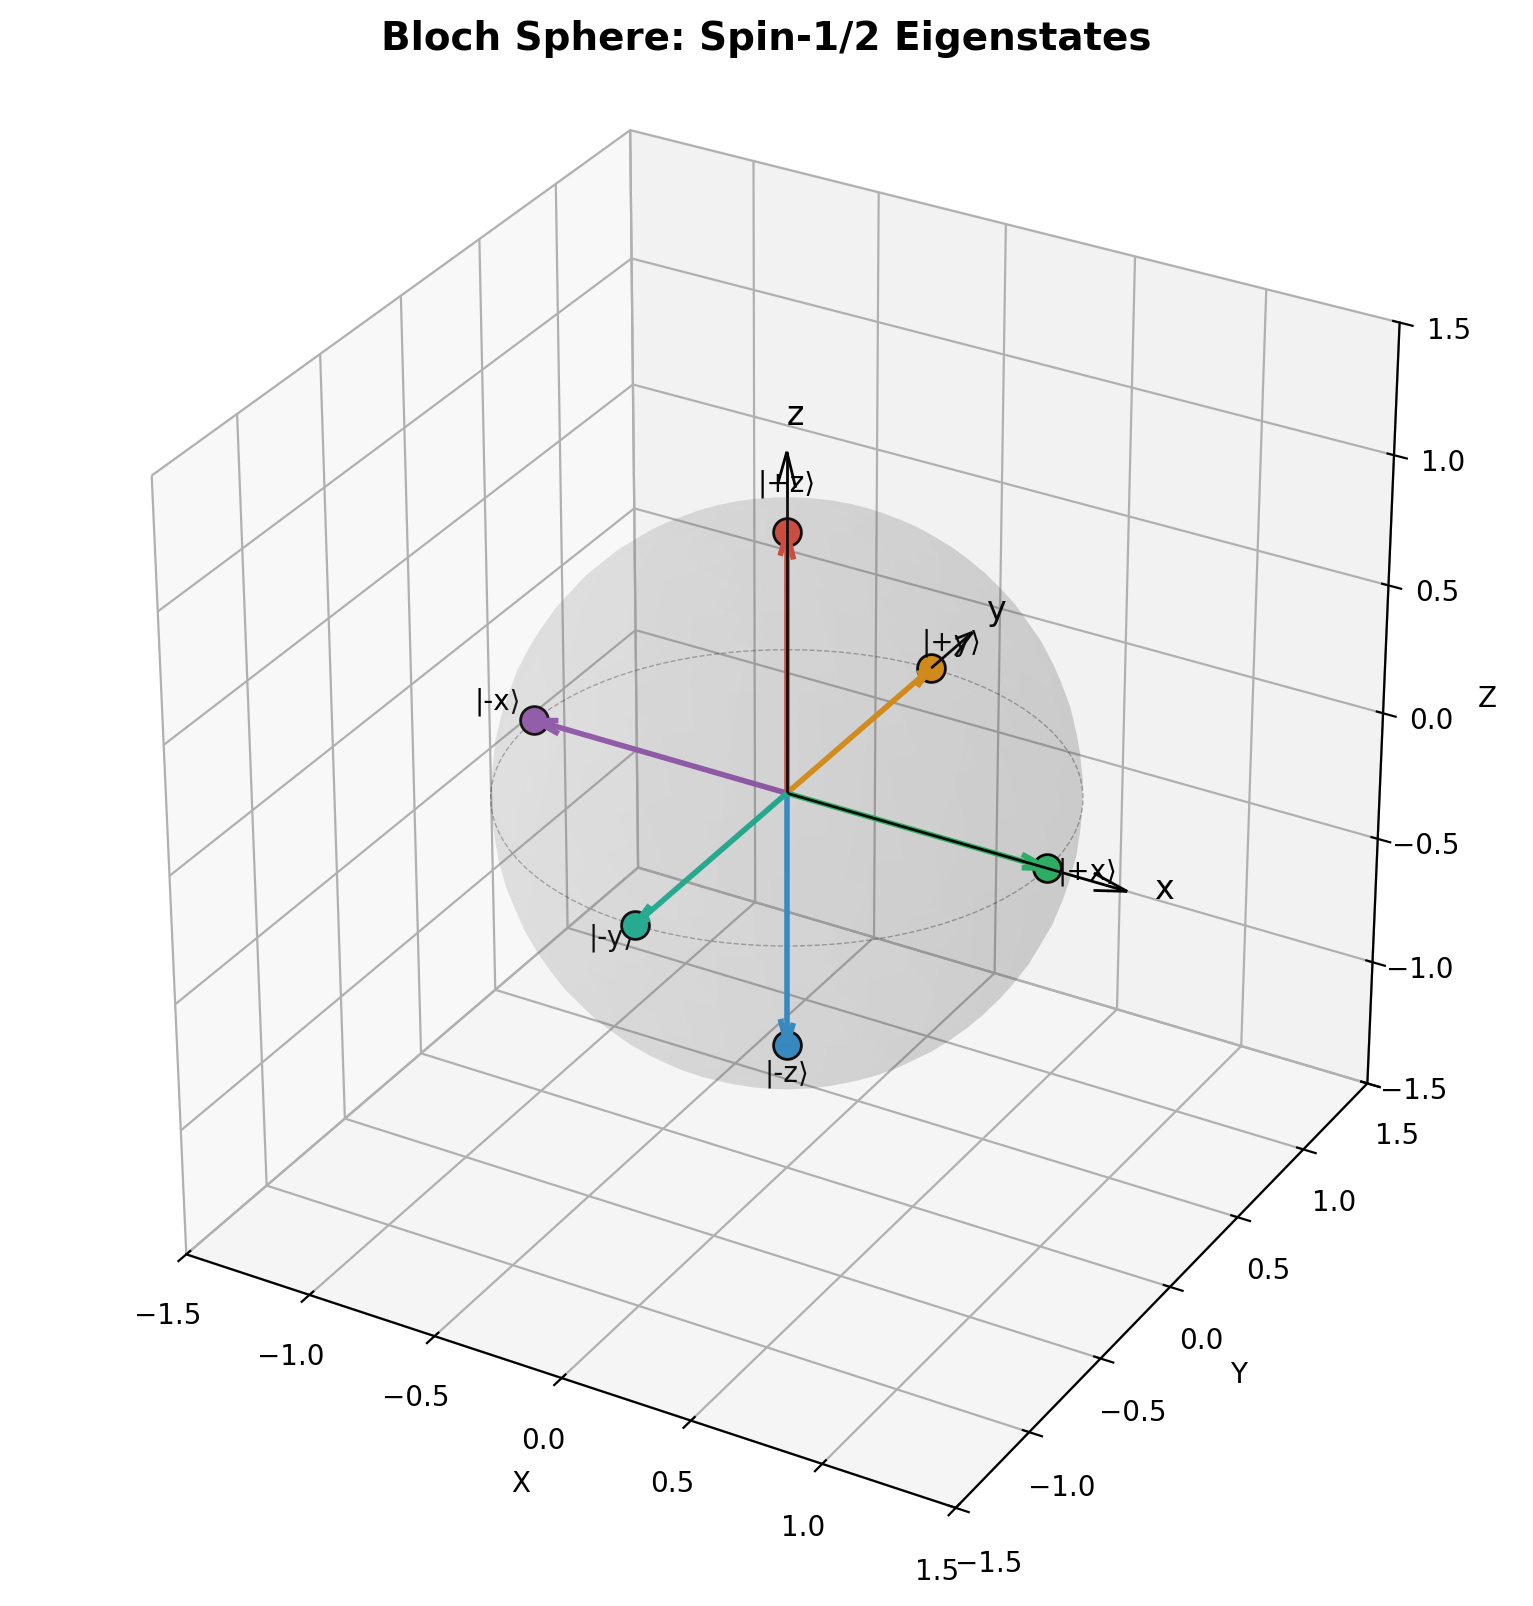

In [6]:
def plot_bloch_sphere(states_info, title="Bloch Sphere"):
    """
    Plot spin states on the Bloch sphere.
    
    Parameters:
    -----------
    states_info : list of tuples
        Each tuple: (theta, phi, label, color)
    title : str
        Plot title
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Draw sphere wireframe
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 30)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='gray')
    
    # Draw axes
    ax.quiver(0, 0, 0, 1.3, 0, 0, color='black', arrow_length_ratio=0.1, linewidth=1)
    ax.quiver(0, 0, 0, 0, 1.3, 0, color='black', arrow_length_ratio=0.1, linewidth=1)
    ax.quiver(0, 0, 0, 0, 0, 1.3, color='black', arrow_length_ratio=0.1, linewidth=1)
    ax.text(1.4, 0, 0, 'x', fontsize=12)
    ax.text(0, 1.4, 0, 'y', fontsize=12)
    ax.text(0, 0, 1.4, 'z', fontsize=12)
    
    # Draw equator
    theta_eq = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta_eq), np.sin(theta_eq), np.zeros_like(theta_eq), 
            'k--', alpha=0.3, linewidth=0.5)
    
    # Plot states
    for theta, phi, label, color in states_info:
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        
        ax.scatter([x], [y], [z], c=color, s=100, edgecolors='black', linewidths=1)
        ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.1, linewidth=2)
        ax.text(x*1.15, y*1.15, z*1.15, label, fontsize=10, ha='center')
    
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_box_aspect([1,1,1])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    return fig, ax

# Define some important spin states
states_to_plot = [
    (0, 0, '|+z⟩', '#e74c3c'),           # Spin up along z
    (np.pi, 0, '|-z⟩', '#3498db'),       # Spin down along z
    (np.pi/2, 0, '|+x⟩', '#2ecc71'),     # Spin up along x
    (np.pi/2, np.pi, '|-x⟩', '#9b59b6'), # Spin down along x
    (np.pi/2, np.pi/2, '|+y⟩', '#f39c12'),   # Spin up along y
    (np.pi/2, 3*np.pi/2, '|-y⟩', '#1abc9c'), # Spin down along y
]

fig, ax = plot_bloch_sphere(states_to_plot, 
                            "Bloch Sphere: Spin-1/2 Eigenstates")
plt.tight_layout()
plt.show()

## Summary

This notebook explored the quantum mechanics of spin-1/2 particles and the Stern-Gerlach experiment:

1. **Spin Quantization**: Spin-1/2 particles can only have spin angular momentum components of $\pm\frac{\hbar}{2}$ along any measurement axis.

2. **Pauli Matrices**: The spin operators are represented by the Pauli matrices, which satisfy $\sigma_i^2 = I$ and anticommute.

3. **Measurement Statistics**: For a state $|\psi\rangle$ measured along direction $\hat{n}$, the probability of measuring spin-up is given by $|\langle +_n|\psi\rangle|^2$.

4. **Non-commutativity**: Sequential measurements along non-parallel directions demonstrate the fundamental non-commutativity of spin operators, a hallmark of quantum mechanics.

5. **Bloch Sphere**: Any spin-1/2 pure state can be visualized as a point on the Bloch sphere, providing geometric insight into quantum state space.

The Stern-Gerlach experiment remains one of the most elegant demonstrations of quantum mechanical principles and is foundational to our understanding of angular momentum quantization.